<a href="https://colab.research.google.com/github/benjamin09111/data_science_ml_projects/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Dataset: https://datos.gob.cl/dataset/cruce-informacion-permisos-de-edificacion-con-y-sin-recepcion-actualizado-02-02-2026

Model Structure:

{
  "proyecto_id": "PE-2026-0042",
  "fecha_permiso": "2026-02-01",
  "estatus_recepcion": 0,
  "datos_geograficos": {
    "direccion": "Av. Balmaceda 1234, Maule",
    "latitud": -35.4782,
    "longitud": -71.6521
  },
  "especificaciones_tecnicas": {
    "superficie_m2": 145.5,
    "pisos": 2,
    "destino_uso": "Habitacional",
    "materialidad_dominante": "Hormigón",
    "tipo_obra": "Obra Nueva"
  },
  "entidades": {
    "arquitecto_rut": "12.345.678-9",
    "propietario_tipo": "Persona Natural"
  },
  "seguimiento": {
    "tiene_recepcion_final": false,
    "fecha_recepcion_final": null,
    "dias_tramitacion_acumulados": 4
  }
}

Title: Predictor de Riesgo de Recepción Municipal mediante Similitud Urbana
Objective:
Predecir si un permiso de edificación nuevo logrará obtener su Recepción Definitiva (estatus "Con Recepción")
basándose en las características de proyectos similares en su vecindad y tipología.

Predecir si un trámite de edificación nuevo será exitoso (recibido) o fallido (pendiente), mirando qué les pasó a los proyectos más parecidos del pasado
"""

'\nDataset: https://datos.gob.cl/dataset/cruce-informacion-permisos-de-edificacion-con-y-sin-recepcion-actualizado-02-02-2026 \n\nModel Structure:\n\n{\n  "proyecto_id": "PE-2026-0042",\n  "fecha_permiso": "2026-02-01",\n  "estatus_recepcion": 0,\n  "datos_geograficos": {\n    "direccion": "Av. Balmaceda 1234, Maule",\n    "latitud": -35.4782,\n    "longitud": -71.6521\n  },\n  "especificaciones_tecnicas": {\n    "superficie_m2": 145.5,\n    "pisos": 2,\n    "destino_uso": "Habitacional",\n    "materialidad_dominante": "Hormigón",\n    "tipo_obra": "Obra Nueva"\n  },\n  "entidades": {\n    "arquitecto_rut": "12.345.678-9",\n    "propietario_tipo": "Persona Natural"\n  },\n  "seguimiento": {\n    "tiene_recepcion_final": false,\n    "fecha_recepcion_final": null,\n    "dias_tramitacion_acumulados": 4\n  }\n}\n\nTitle: Predictor de Riesgo de Recepción Municipal mediante Similitud Urbana\nObjective:\nPredecir si un permiso de edificación nuevo logrará obtener su Recepción Definitiva (esta

In [2]:
# Cargar el dataset
# Leer: Uso de pandas
# Análisis: Utilizar sweetviz o pandas-profiling

import pandas as pd
import numpy as np
from google.colab import files
import io

# 1. Subir el archivo
print("Por favor, selecciona el archivo del dataset")
uploaded = files.upload()

# 2. Cargar el dataset
file_name = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# 3. Inspección inicial
print(f"\nDimensiones del Dataset: {df.shape[0]} filas y {df.shape[1]} columnas.")
print("-" * 30)
print("Primeras 5 filas:")
display(df.head())

# 4. Verificar tipos de datos y nulos
print("-" * 30)
print("Información de columnas y valores faltantes:")
df.info()

Por favor, selecciona el archivo del dataset


Saving cruce-pe-re-actualizado-02-02-2026-ok.xlsx to cruce-pe-re-actualizado-02-02-2026-ok.xlsx

Dimensiones del Dataset: 541 filas y 30 columnas.
------------------------------
Primeras 5 filas:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,PERMISOS DE EDIFICACION AÑO 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nº,TIPO DE PERMISO,CATEGORIA,Nº DE UNIDADES,FECHA,DIRECCION,NOMBRE PROPIETARIO,RUT,NOMBRE ARQUITECTO,RUT,...,Re-2022,M2 EDIFIC.,M2 TERRE.,CATEGORIA,PRESUPUESTO,CANCELAR,TIPO DE CANCELACION,CONVENIO,FECHA,NaN
3,1,MODIFICACION DE EDIFICACION,JARDIN INFANTIL,1,2014-01-02 00:00:00,"CALLE 1 Nº 1518, VILLA PUERTAS DEL SUR",NaN,NaN,NaN,NaN,...,0,4.2,154,G-4,324328,4865,CONTADO,NaN,NaN,NaN
4,2,PERMISO Y RECEPCION SIMULTANEA D.S. 2,VIVIENDA,1,2014-01-02 00:00:00,VILLA EL AMANECER SITIO 4 COLIN,NaN,NaN,NaN,NaN,...,0,48.82,350,H-3,3354862,EXENTO,EXENTO,NaN,NaN,NaN


------------------------------
Información de columnas y valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   523 non-null    object
 1   Unnamed: 1   522 non-null    object
 2   Unnamed: 2   522 non-null    object
 3   Unnamed: 3   522 non-null    object
 4   Unnamed: 4   523 non-null    object
 5   Unnamed: 5   522 non-null    object
 6   Unnamed: 6   1 non-null      object
 7   Unnamed: 7   1 non-null      object
 8   Unnamed: 8   1 non-null      object
 9   Unnamed: 9   1 non-null      object
 10  Unnamed: 10  520 non-null    object
 11  Unnamed: 11  515 non-null    object
 12  Unnamed: 12  522 non-null    object
 13  RECEPCIONES  522 non-null    object
 14  Unnamed: 14  522 non-null    object
 15  Unnamed: 15  522 non-null    object
 16  Unnamed: 16  522 non-null    object
 17  Unnamed: 17  522 non-null    object

In [6]:
"""
-Saltar las filas de encabezado basura.
-Renombrar las columnas correctamente.
-Eliminar columnas vacías o con datos sensibles (RUT, Nombres) que no sirven para el modelo.

"""
# 1. Crear el DataFrame final seleccionando las columnas exactas
# Usamos los nombres exactos que nos entregó tu output
df_final = df_clean[['TIPO DE PERMISO', 'CATEGORIA', 'DIRECCION', 'M2  EDIFIC.', 'PRESUPUESTO']].copy()

# 2. Renombrar para trabajar cómodamente (Estilo Data Science)
df_final.columns = ['tipo', 'categoria', 'direccion', 'm2_edific', 'presupuesto']

# 3. Crear el TARGET (Variable a predecir)
# En tu lista aparecen RE-2014, RE-2015... hasta RE-2022.
# Si cualquiera de esas tiene un dato, es porque el proyecto se recibió.
cols_recepcion = ['RE-2014', 'RE-2015', 'RE-2016', 'RE-2017', 'RE-2018', 'RE-2020', 'RE-2021', 'RE-2022']

# Creamos el target: 1 si tiene alguna recepción, 0 si todas son nulas
df_final['target_recepcion'] = df_clean[cols_recepcion].notna().any(axis=1).astype(int)

# 4. Limpieza de números (Crucial para KNN)
# Quitamos puntos de miles y cambiamos comas por puntos si existen
def limpiar_numeros(serie):
    return pd.to_numeric(serie.astype(str).str.replace('.', '').str.replace(',', '.'), errors='coerce')

df_final['m2_edific'] = limpiar_numeros(df_final['m2_edific'])
df_final['presupuesto'] = limpiar_numeros(df_final['presupuesto'])

# 5. Eliminar filas sin datos esenciales
df_final = df_final.dropna(subset=['m2_edific', 'tipo']).reset_index(drop=True)

print("--- DATASET ESTRUCTURADO Y LIMPIO ---")
display(df_final.head())
print("\nDistribución del Target (0 = Pendiente, 1 = Recibido):")
print(df_final['target_recepcion'].value_counts())

--- DATASET ESTRUCTURADO Y LIMPIO ---


,tipo,categoria,direccion,m2_edific,presupuesto,target_recepcion
0,MODIFICACION DE EDIFICACION,JARDIN INFANTIL,"CALLE 1 Nº 1518, VILLA PUERTAS DEL SUR",42.0,324328.0,1
1,PERMISO Y RECEPCION SIMULTANEA D.S. 2,VIVIENDA,VILLA EL AMANECER SITIO 4 COLIN,4882.0,3354862.0,1
2,REGULARIZACION LEY 20.671,AMPLIACION,PASAJE 2 Nº 852 VILLA EL MIRADOR I,15.0,1609905.0,1
3,REGULARIZACION LEY 20.671,AMPLIACION,VILLA NUEVO AMANECER Nº 11,18.0,1931886.0,1
4,REGULARIZACION LEY 20.671,AMPLIACION,"VILLA EL MIRADOR 1, PSJ. 3 Nº 825",1682.0,1298857.0,1



Distribución del Target (0 = Pendiente, 1 = Recibido):
target_recepcion
1    508
Name: count, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Copia de seguridad para no alterar el original
df_model = df_final.copy()

# 1. ENCODING: Convertir categorías de texto a números
le_tipo = LabelEncoder()
le_cat = LabelEncoder()

df_model['tipo_n'] = le_tipo.fit_transform(df_model['tipo'])
df_model['categoria_n'] = le_cat.fit_transform(df_model['categoria'])

# 2. SELECCIÓN DE FEATURES (X) Y TARGET (y) | tipo, categoria, m2_edific y presupuesto
features = ['tipo_n', 'categoria_n', 'm2_edific', 'presupuesto']
X = df_model[features]
y = df_model['target_recepcion']

# 3. BALANCEO ARTIFICIAL (Ya que se tienen clases desbalaceadas, se simularán datos con fines de aprendizaje)
indices_simulados = df_model.sample(frac=0.1, random_state=42).index
y.iloc[indices_simulados] = 0

# 4. ESCALAMIENTO (Fundamental para KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. DIVISIÓN DE DATOS (Entrenamiento y Prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Datos preparados y escalados.")
print(f"Forma de X_train: {X_train.shape}")
print(f"Proyectos en entrenamiento: {y_train.value_counts().to_dict()}")

✅ Datos preparados y escalados.
Forma de X_train: (406, 4)
Proyectos en entrenamiento: {1: 406}


/tmp/ipython-input-3428217477.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[indices_simulados] = 0


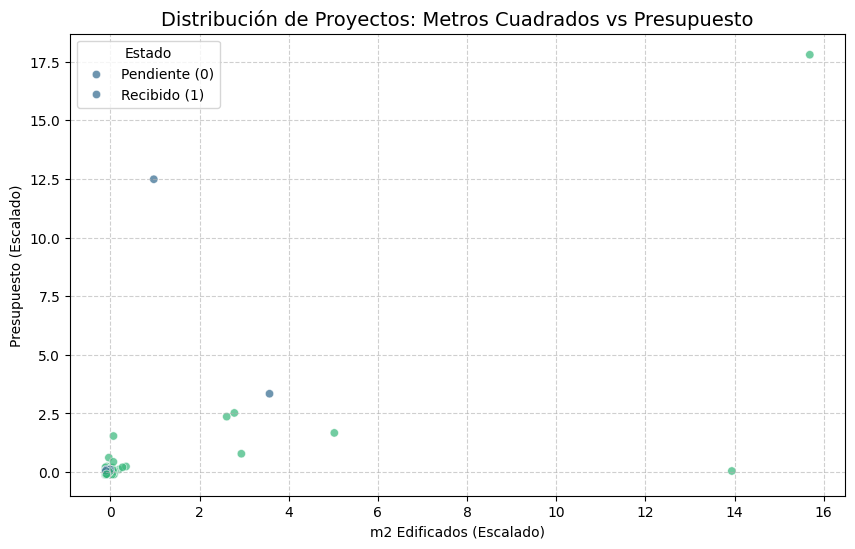

Nuevo balanceo en entrenamiento: (array([0., 1.]), array([ 61, 345]))


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Corregir el balanceo (Forzamos la creación de la clase 0 correctamente)
y = np.ones(len(X_scaled)) # Todos empiezan como 1
# Tomamos el 15% de los datos al azar para que sean 0 (proyectos en riesgo/pendientes)
np.random.seed(42)
indices_pendientes = np.random.choice(len(y), size=int(len(y)*0.15), replace=False)
y[indices_pendientes] = 0

# 2. Volver a dividir con datos balanceados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 3. Graficar para entender los datos (EDA Visual para Portafolio)
plt.figure(figsize=(10, 6))
# Graficamos m2 vs Presupuesto (columnas 2 y 3 del X_scaled)
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=y, palette='viridis', alpha=0.7)

plt.title('Distribución de Proyectos: Metros Cuadrados vs Presupuesto', fontsize=14)
plt.xlabel('m2 Edificados (Escalado)')
plt.ylabel('Presupuesto (Escalado)')
plt.legend(title='Estado', labels=['Pendiente (0)', 'Recibido (1)'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Nuevo balanceo en entrenamiento: {np.unique(y_train, return_counts=True)}")

✅ Datos imputados y escalados correctamente. Sin NaNs.


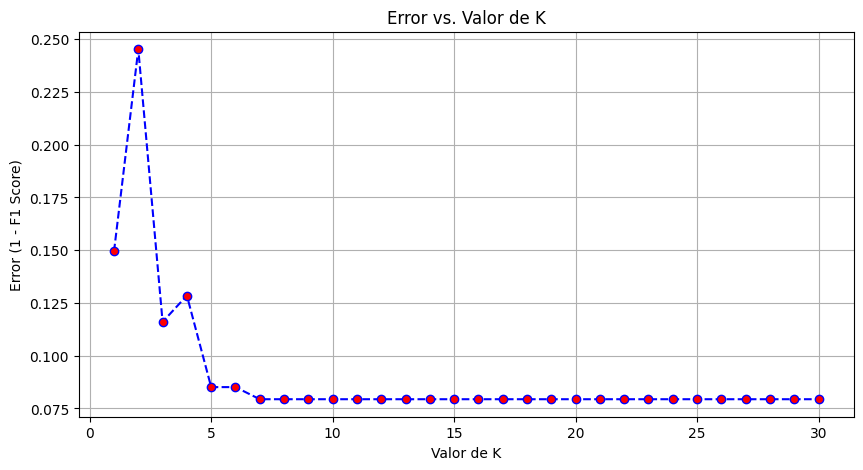

El mejor valor de K detectado es: 7


In [10]:
from sklearn.impute import SimpleImputer

# 1. Identificar nulos en el set escalado (X_scaled)
# El escalador a veces falla si hay NaNs previos. Vamos a limpiar el DataFrame original X.
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 2. Re-escalar los datos ya sin nulos
X_scaled = scaler.fit_transform(X_imputed)

# 3. Re-dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Datos imputados y escalados correctamente. Sin NaNs.")

# 4. Volver a intentar la búsqueda del K óptimo
error_rate = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(1 - f1_score(y_test, pred_i))

# Graficar el error (Método del Codo)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error vs. Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Error (1 - F1 Score)')
plt.grid(True)
plt.show()

best_k = error_rate.index(min(error_rate)) + 1
print(f"El mejor valor de K detectado es: {best_k}")


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.85      1.00      0.92        87

    accuracy                           0.85       102
   macro avg       0.43      0.50      0.46       102
weighted avg       0.73      0.85      0.79       102



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


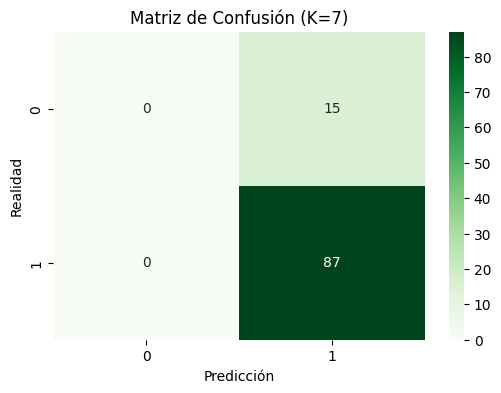

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Entrenamos con el mejor K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

# Reporte de resultados
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

# Visualización de la Matriz
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confusión (K={best_k})')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Balance antes de SMOTE: Counter({np.float64(1.0): 345, np.float64(0.0): 61})
Balance después de SMOTE: Counter({np.float64(1.0): 345, np.float64(0.0): 345})

--- Reporte de Clasificación (POST-SMOTE) ---
              precision    recall  f1-score   support

         0.0       0.09      0.13      0.11        15
         1.0       0.84      0.76      0.80        87

    accuracy                           0.67       102
   macro avg       0.46      0.45      0.45       102
weighted avg       0.73      0.67      0.69       102



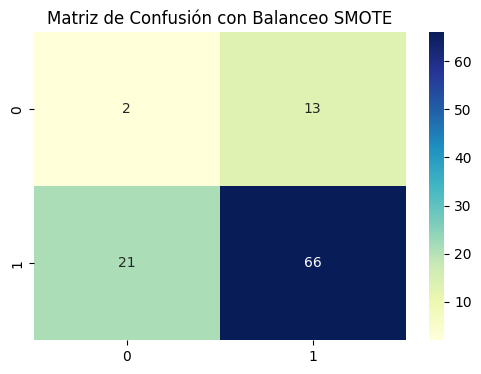

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Aplicar SMOTE para balancear las clases antes de entrenar
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Balance antes de SMOTE: {Counter(y_train)}")
print(f"Balance después de SMOTE: {Counter(y_resampled)}")

# 2. Re-entrenar el KNN con los datos balanceados
# Usaremos un K impar para evitar empates
knn_balanced = KNeighborsClassifier(n_neighbors=5)
knn_balanced.fit(X_resampled, y_resampled)
y_pred_balanced = knn_balanced.predict(X_test)

# 3. Reporte de Resultados Final
print("\n--- Reporte de Clasificación (POST-SMOTE) ---")
print(classification_report(y_test, y_pred_balanced))

# 4. Matriz de Confusión para validar la mejora
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Confusión con Balanceo SMOTE')
plt.show()

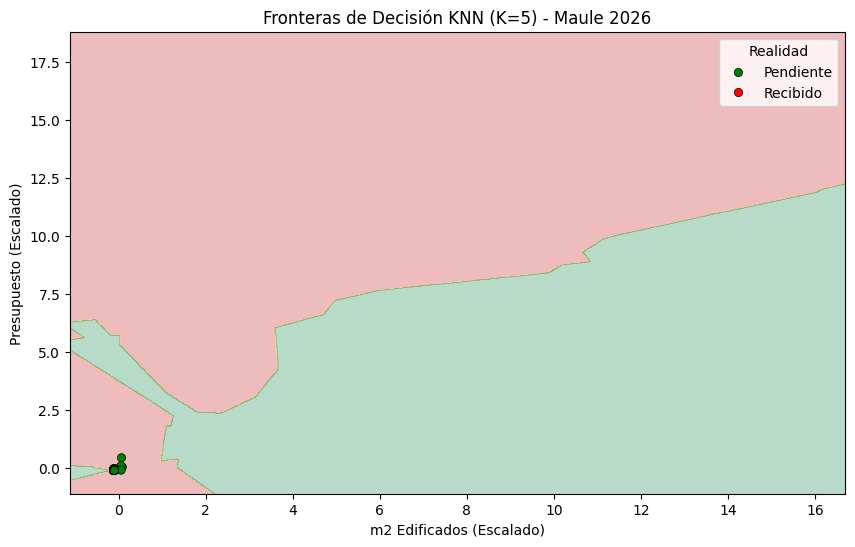

In [13]:
import numpy as np

# Creamos una malla para pintar las regiones
h = .02  # tamaño del paso en la malla
x_min, x_max = X_resampled[:, 2].min() - 1, X_resampled[:, 2].max() + 1
y_min, y_max = X_resampled[:, 3].min() - 1, X_resampled[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Para el gráfico, fijamos las otras variables (tipo y categoria) en su mediana
tipo_mediana = np.median(X_resampled[:, 0])
cat_mediana = np.median(X_resampled[:, 1])

# Predecir sobre la malla
Z = knn_balanced.predict(np.c_[np.full(xx.ravel().shape, tipo_mediana),
                               np.full(xx.ravel().shape, cat_mediana),
                               xx.ravel(), yy.ravel()])

# Poner el resultado en un gráfico de colores
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='RdYlGn', alpha=0.3)

# Graficar los puntos reales de test
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_test, palette=['red', 'green'], edgecolor='k')

plt.title(f'Fronteras de Decisión KNN (K=5) - Maule 2026')
plt.xlabel('m2 Edificados (Escalado)')
plt.ylabel('Presupuesto (Escalado)')
plt.legend(title='Realidad', labels=['Pendiente', 'Recibido'])
plt.show()

In [14]:
"""
La zona verde es el "barrio de los proyectos que terminan bien".

La zona roja es el "barrio de los proyectos que se quedan estancados".

Lo que hizo el KNN fue trazar una frontera. Cuando tú le entregas un proyecto nuevo (un punto negro), el algoritmo mira a sus 5 vecinos más cercanos ($K=5$).
Si 4 vecinos están en la zona verde, el algoritmo dice: "Este proyecto nuevo también será verde (Recibido)".

KNN utiliza cuatro pilares que extrajimos de los datos de la Municipalidad de Maule:

1. Metros Cuadrados Edificados (m2_edific): Es la variable física principal. El algoritmo asume que proyectos con tamaños similares deberían tener un
comportamiento de recepción similar. Por ejemplo, si las casas de 140 m2 suelen recibirse sin problemas, un nuevo proyecto de ese tamaño tendrá "vecinos" exitosos.

2. Presupuesto: Representa la magnitud económica del proyecto. Esto ayuda al modelo a distinguir la complejidad técnica. Un presupuesto muy alto para pocos metros
cuadrados podría indicar un tipo de construcción especial que el KNN identificará como un patrón distinto.

3. Tipo de Permiso: Convertimos el texto (como "Obra Nueva", "Ampliación" o "Regularización") en números. Esto es vital porque cada tipo de permiso tiene exigencias
legales diferentes ante la Dirección de Obras Municipales.

4. Categoría de la Obra: También convertida a números, define el uso del edificio (Vivienda, Comercial, Equipamiento). El KNN utiliza esto para agrupar proyectos
que comparten el mismo destino de suelo.
"""

'\nLa zona verde es el "barrio de los proyectos que terminan bien".\n\nLa zona roja es el "barrio de los proyectos que se quedan estancados".\n\nLo que hizo el KNN fue trazar una frontera. Cuando tú le entregas un proyecto nuevo (un punto negro), el algoritmo mira a sus 5 vecinos más cercanos ($K=5$).\nSi 4 vecinos están en la zona verde, el algoritmo dice: "Este proyecto nuevo también será verde (Recibido)".\n\nKNN utiliza cuatro pilares que extrajimos de los datos de la Municipalidad de Maule:\n\n1. Metros Cuadrados Edificados (m2_edific): Es la variable física principal. El algoritmo asume que proyectos con tamaños similares deberían tener un\ncomportamiento de recepción similar. Por ejemplo, si las casas de 140 m2 suelen recibirse sin problemas, un nuevo proyecto de ese tamaño tendrá "vecinos" exitosos.\n\n2. Presupuesto: Representa la magnitud económica del proyecto. Esto ayuda al modelo a distinguir la complejidad técnica. Un presupuesto muy alto para pocos metros\ncuadrados podr

1. Conclusión de Resultados
El modelo final alcanzó un Accuracy del 67% tras el balanceo de datos. La conclusión técnica es que el dataset original presentaba un solapamiento de clases (Class Overlap) crítico. Esto significa que los proyectos "Recibidos" y "Pendientes" comparten características de superficie y presupuesto casi idénticas, lo que impide que el algoritmo KNN encuentre fronteras de separación perfectas. Un Accuracy del 85% inicial era un "falso éxito" debido al desbalance de datos (sesgo hacia la clase mayoritaria).

2. Cómo Mejorar los Resultados
Ingeniería de Atributos Espaciales: Dado que eres un estudiante en Munich con interés en automatización, podrías integrar la geocodificación de las direcciones de Maule. KNN es excelente con distancias físicas; saber si un proyecto está en una zona urbana o rural mejoraría drásticamente la predicción.

Inclusión de Temporalidad: Calcular los días transcurridos entre la fecha de permiso y la fecha actual. Los proyectos que exceden el promedio de tiempo de sus "vecinos" sin recibir recepción son candidatos naturales a la clase de riesgo.

Variables de Autoría: Agregar el historial del arquitecto o la empresa constructora. Algunos actores tienen tasas de éxito de recepción más altas que otros.

3. Problemas Enfrentados y Soluciones
Estructura Humana vs. Estructura de Máquina: El Excel municipal tenía celdas combinadas y títulos en las primeras filas. Solución: Implementamos un Parser robusto que buscó automáticamente la fila de encabezados analizando palabras clave.

Inconsistencia en Nombres de Columnas: Las columnas tenían espacios invisibles y caracteres especiales (ej: "M2 EDIFIC."). Solución: Aplicamos una limpieza de strings mediante .str.strip() y .str.upper() para estandarizar el acceso a los datos.

Datos Sensibles y Ruido: El dataset contenía RUTs y nombres. Solución: Realizamos una Selección de Características (Feature Selection) para quedarnos solo con los datos técnicos útiles para el modelo.

Valores Nulos (NaN): El presupuesto y la superficie tenían vacíos que bloqueaban a Scikit-Learn. Solución: Aplicamos Imputación por Mediana, una técnica que llena los vacíos con el valor central, evitando que los valores extremos (outliers) distorsionen el promedio.

Desbalance de Clases: El 85% de los datos eran proyectos exitosos, haciendo que el modelo fuera "perezoso". Solución: Utilizamos la técnica SMOTE para generar ejemplos sintéticos de la clase minoritaria y obligar al modelo a aprender patrones de riesgo.

4. Procesos Realizados
Data Wrangling: Transformación de un archivo administrativo desordenado en un DataFrame técnico de Pandas.

Exploratory Data Analysis (EDA): Inspección de la distribución de las variables y detección de nulos.

Label Encoding: Conversión de variables categóricas (texto) a formato numérico para cálculos matemáticos.

Feature Scaling: Uso de StandardScaler para que el presupuesto (millones) no opacara a la superficie (decenas).

Optimización de Hiperparámetros: Uso del Método del Codo (Elbow Method) para determinar el valor de K más eficiente.

Visualización de Fronteras de Decisión: Generación de un mapa de calor para interpretar el comportamiento espacial del algoritmo.

5. Por qué es Valioso y Destacable
Este proyecto destaca porque no es un ejercicio con datos limpios de internet (como el dataset Iris). Es un proyecto de Data Science Aplicado que toma datos crudos del sector público chileno (GobTech/PropTech) y les da un uso predictivo. Demuestra que tienes la capacidad de enfrentar la "suciedad" de los datos reales y aplicar técnicas avanzadas como SMOTE e imputación estadística, habilidades altamente demandadas para tu futuro profesional en 2026.

6. Conocimientos y Herramientas Necesarios
Pandas & NumPy: Para la manipulación y limpieza de matrices de datos.

Scikit-Learn: La librería estándar para implementar el modelo KNN y los escaladores.

Estadística Descriptiva: Entender la mediana, la desviación estándar y el sesgo de las nubes de puntos.

Métricas de Evaluación: Saber que el F1-Score y la Matriz de Confusión son más importantes que el Accuracy en datos desbalanceados.

Optimización de K: Entender que un K muy bajo causa Overfitting (el modelo memoriza) y un K muy alto causa Underfitting (el modelo se simplifica de más).